## Task 1: Import packages and Load data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Task 2: Clean and Preprocess data

### Task 2.1: Merge 12-month data

In [3]:
path = "data"
list_file = os.listdir(path)
months = []
for file in list_file:
    print(file)
    df_month = pd.read_csv(f"{path}/{file}")
    months.append(df_month)

df = pd.concat(months)
df.to_csv("./data/all_month.csv", index=False)

sales2019_1.csv
sales2019_10.csv
sales2019_11.csv
sales2019_12.csv
sales2019_2.csv
sales2019_3.csv
sales2019_4.csv
sales2019_5.csv
sales2019_6.csv
sales2019_7.csv
sales2019_8.csv
sales2019_9.csv


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Task 2.2: Add 'Month' column

In [5]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'].unique()

array(['01', nan, 'Or', '02', '10', '11', '12', '03', '04', '05', '06',
       '07', '08', '09'], dtype=object)

### Task 2.3: Get rid of 'NaN' and 'Or' value

In [6]:
df = df.dropna(how='all')
df['Month'].unique()

array(['01', 'Or', '02', '10', '11', '12', '03', '04', '05', '06', '07',
       '08', '09'], dtype=object)

In [7]:
df = df[df['Month'] != 'Or']
df['Month'].unique()

array(['01', '02', '10', '11', '12', '03', '04', '05', '06', '07', '08',
       '09'], dtype=object)

## Task 3: Reporting

### Task 3.1: What was the best month for sales? How much was earned that month?

Best month for sales is:  12


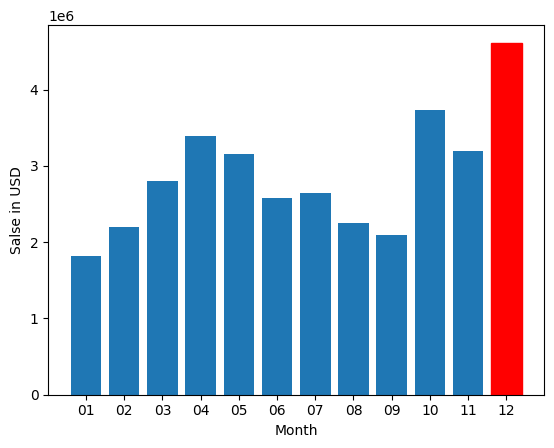

In [8]:
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

df['Sale'] = df['Price Each']*df['Quantity Ordered']
salse_month = df['Sale'].groupby(df['Month']).sum()
# salse_month.idxmax()
best_month = salse_month.idxmax()
print("Best month for sales is: ", best_month)

barlist = plt.bar(salse_month.index, salse_month)
barlist[-1].set_color('r')
plt.xlabel("Month")
plt.ylabel("Salse in USD")
plt.show()

### Task 3.2: What city has the best sales?

Best City for sales is:  San Francisco, CA


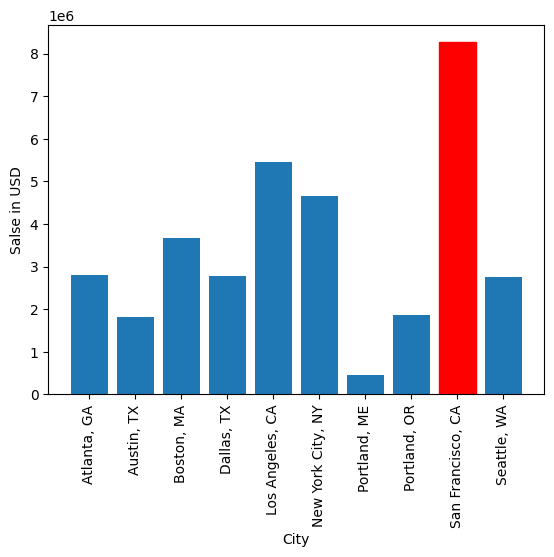

In [9]:
def extract_city(x):
    city = x.split(',')[1].strip()
    state = x.split(',')[2].strip()
    return city+', ' +state.split(' ')[0]

df['City'] = df['Purchase Address'].apply(extract_city)

salse_city = df['Sale'].groupby(df['City']).sum()
print("Best City for sales is: ", salse_city.idxmax())

barlist = plt.bar(salse_city.index, salse_city)
barlist[-2].set_color('r')
plt.xlabel("City")
plt.ylabel("Salse in USD")
plt.xticks(rotation = 90)
plt.show()

### Task 3.3: What time should we display ads to maximize the likelihood of customer’s buying product?

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [11]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.00,"Boston, MA",21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.95,"Portland, OR",14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.98,"San Francisco, CA",13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.99,"Los Angeles, CA",20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.99,"Austin, TX",11


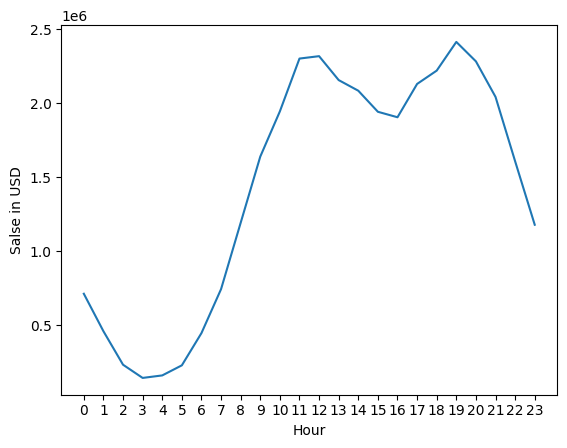

In [12]:
sales_hour = df['Sale'].groupby(df['Hour']).sum()
sort_hour = sales_hour.sort_values(ascending=False)
num_hour_ads = 4
sort_hour.iloc[0: num_hour_ads]

plt.plot(sales_hour.index, sales_hour)
plt.xticks(sales_hour.index)
plt.xlabel("Hour")
plt.ylabel("Salse in USD")
plt.show()

### Task 3.4: What products are most often sold together?

In [13]:
df['Order ID'] = pd.to_numeric(df['Order ID'])
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,"Austin, TX",16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,"Austin, TX",16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,"Los Angeles, CA",8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,"Los Angeles, CA",8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,"New York City, NY",11
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,3.84,"Atlanta, GA",20
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,11.99,"Atlanta, GA",0
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,5.98,"Atlanta, GA",0
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,600.00,"San Francisco, CA",13


In [17]:
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df_dup

C:\Users\minhh\AppData\Local\Temp\ipykernel_4864\2482509757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,All Products
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,"Austin, TX",16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,"Austin, TX",16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,"Los Angeles, CA",8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,"Los Angeles, CA",8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,"New York City, NY",11,"Vareebadd Phone, Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,3.84,"Atlanta, GA",20,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,11.99,"Atlanta, GA",0,"Wired Headphones, AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,5.98,"Atlanta, GA",0,"Wired Headphones, AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,600.00,"San Francisco, CA",13,"Google Phone, USB-C Charging Cable"


In [20]:
df_dup = df_dup[["Order ID", 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts()

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
                                                       ... 
Vareebadd Phone, Wired Headphones, iPhone                 1
Google Phone, Wired Headphones, USB-C Charging Cable      1
LG Washing Machine, Wired Headphones                      1
LG Washing Machine, Google Phone                          1
LG Washing Machine, AA Batteries (4-pack)                 1
Name: All Products, Length: 366, dtype: int64

### Task 3.5: What product sold the most? Why do you think it sold the most?

In [26]:
prices = df['Price Each'].groupby(df['Product']).mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\minhh\AppData\Local\Temp\ipykernel_4864\1509381393.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(most_sales.index, rotation=90)


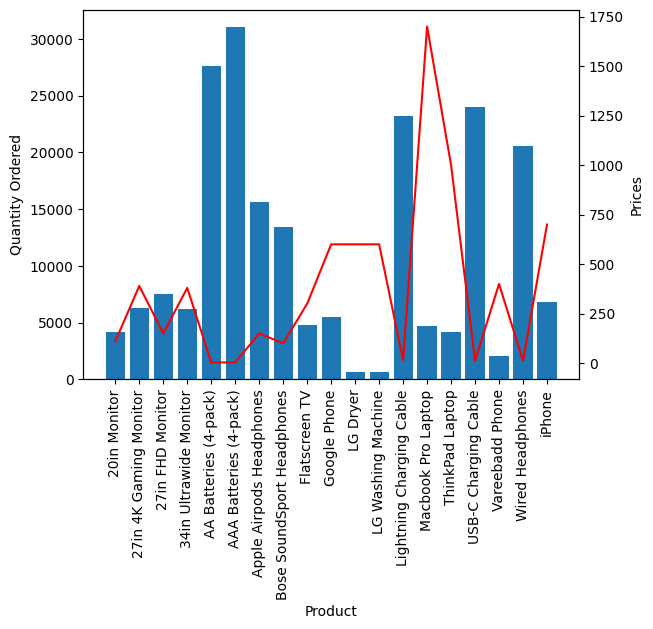

In [37]:
most_sales = df['Quantity Ordered'].groupby(df['Product']).sum()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(most_sales.index, most_sales)
ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Ordered")
ax1.set_xticklabels(most_sales.index, rotation=90)

ax2.plot(prices.index, prices, color='r')
ax2.set_ylabel("Prices")

plt.show()